# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/clean_data2.csv"
df = pd.read_csv(filename, sep=',', encoding='cp1252')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,5617787463,34656032,9809225,652860.0,53.083405
1,Albania,Europe & Central Asia,412498239,2876101,5716853,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916881571,40606052,145400217,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,1183474523,55599,113349248,200.0,277.995000
4,Andorra,Europe & Central Asia,3698862203,77281,462042,470.0,164.427660


Переглядаю типи змінних

In [39]:
print(df.dtypes)

Country Name           object
Region                 object
GDP per capita          int64
Population              int64
CO2 emission            int64
Area                  float64
Population density    float64
dtype: object


Будую графіки

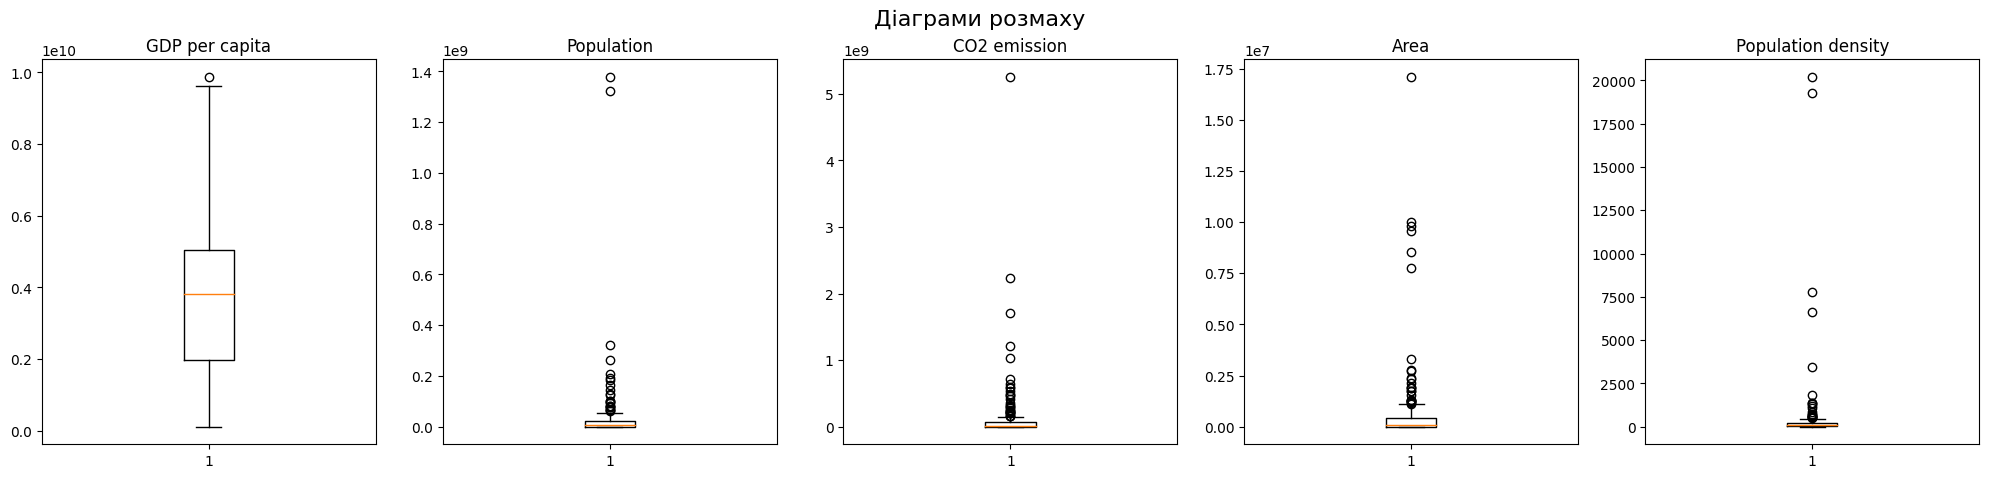

Text(0.5, 1.0, 'Dependence between CO2 emission and population')

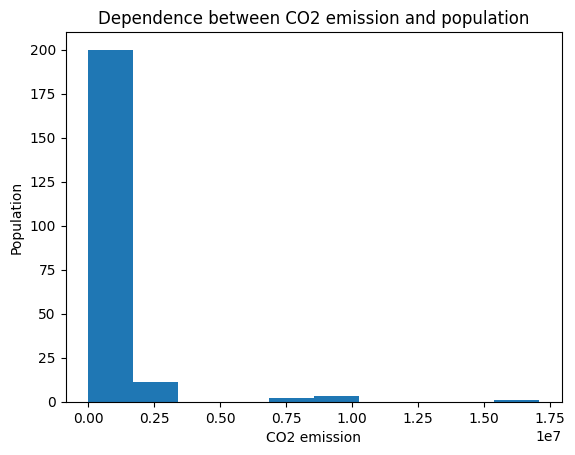

In [40]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

axs[4].set_title('Population density')
axs[4].boxplot(df['Population density'])

plt.show()

plt.hist(df['Area'])
plt.xlabel("CO2 emission")
plt.ylabel("Population")
plt.title("Dependence between CO2 emission and population")

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

In [41]:
df.select_dtypes(include=['int', 'float']).corr()

,GDP per capita,Population,CO2 emission,Area,Population density
GDP per capita,1.000000,0.063169,0.076036,0.173848,0.094947
Population,0.063169,1.000000,0.510186,0.453500,-0.028449
CO2 emission,0.076036,0.510186,1.000000,0.598965,-0.021339
Area,0.173848,0.453500,0.598965,1.000000,-0.064138
Population density,0.094947,-0.028449,-0.021339,-0.064138,1.000000


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та 'CO2 emission'

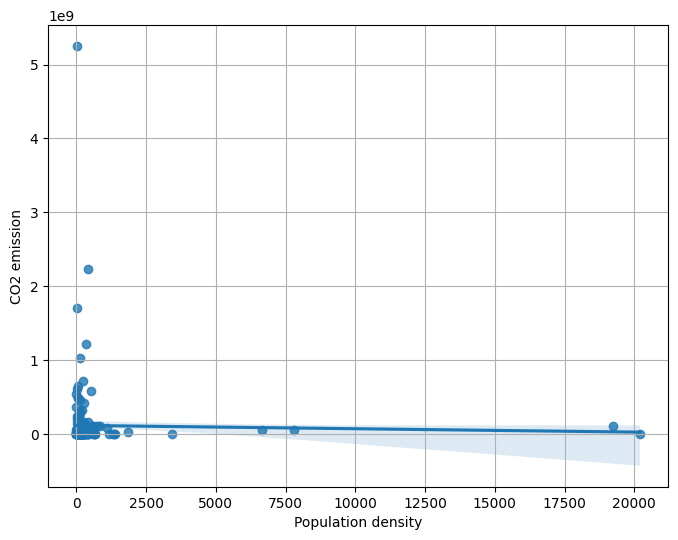

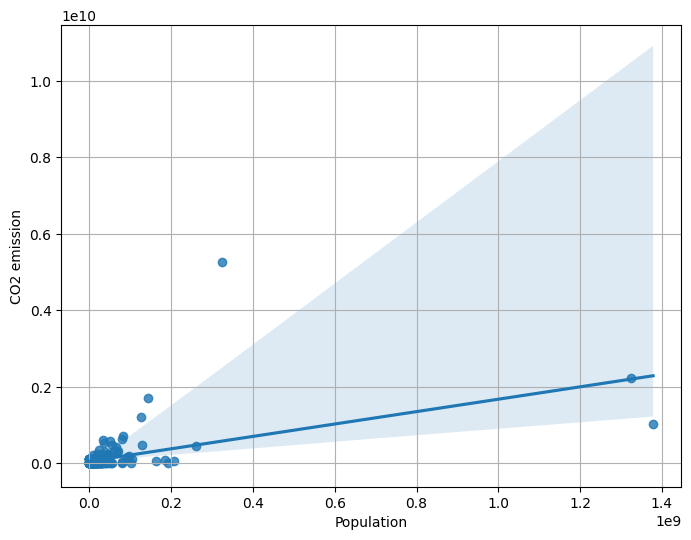

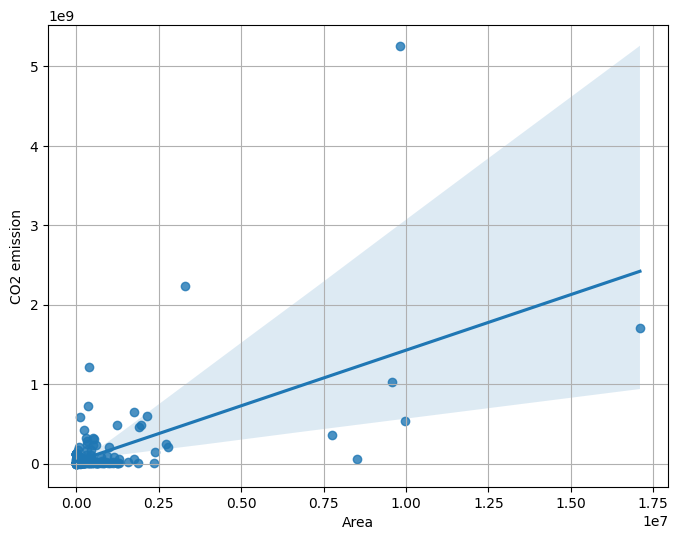

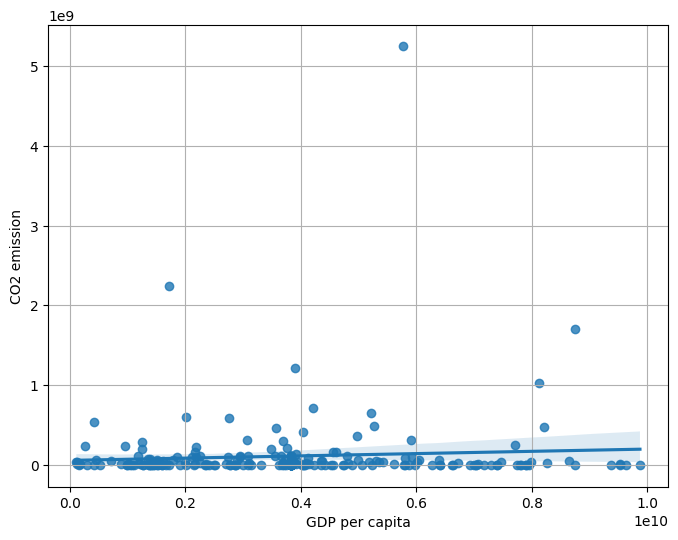

In [42]:
columns = ['Population density', 'Population', 'Area', 'GDP per capita']

for x in columns:
     plt.figure(figsize=(8, 6))
     sns.regplot(x=x, y='CO2 emission', data=df)
     plt.grid(True)
     plt.xlabel(x)
     plt.ylabel('CO2 emission')
     plt.show()

Будую діаграму розмаху для 'CO2 emission' по регіонам

<Axes: xlabel='Region', ylabel='CO2 emission'>

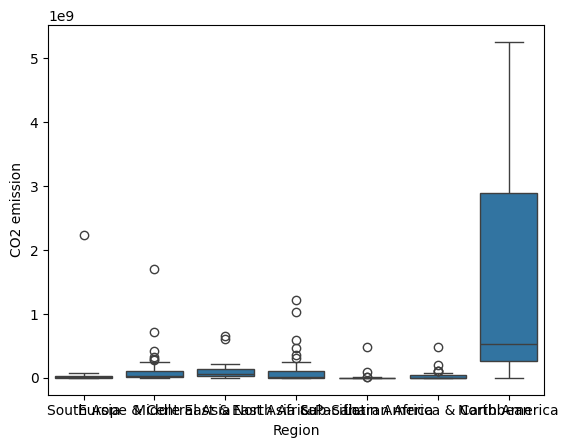

In [43]:
sns.boxplot(x='Region', y='CO2 emission', data=df)

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та 'CO2 emission'

Коефіцієнт кореляції Пірсона

In [44]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Population density'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.021339035546575458  with a P-value of P = 0.7546121855986065


Оскільки p-value>0.1 немає доказів того, що кореляція є значною, а лінійний зв'язок негативний та слабкий(~-0.017).

In [45]:
pearson_coef, p_value = stats.pearsonr(df['Population'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5101858757129176  with a P-value of P = 8.832973445863518e-16


Оскільки p-value<0.001 є вагомі докази того, що кореляція є значною, а лінійний зв'язок досить сильний(~0.802).

In [46]:
pearson_coef, p_value = stats.pearsonr(df['Area'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5989652323726484  with a P-value of P = 1.6183392964791586e-22


Оскільки p-value<0.001 є вагомі докази того, що кореляція є значною, а лінійний зв'язок помірно сильний(~0.586).

In [47]:
pearson_coef, p_value = stats.pearsonr(df['GDP per capita'], df['CO2 emission'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.07603565747731764  with a P-value of P = 0.2647556446075111


Оскільки p-value>0.1 немає доказів того, що кореляція є значною, а лінійний зв'язок слабкий(~0.089).

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає 'Region' на 'CO2 emission'.

In [48]:
group = df[['Region', 'CO2 emission']].groupby(['Region'])
group.mean()

,CO2 emission
Region,
East Asia & Pacific,1.371923e+08
Europe & Central Asia,1.101854e+08
Latin America & Caribbean,3.655352e+07
Middle East & North Africa,1.276903e+08
North America,1.930683e+09
South Asia,2.949423e+08
Sub-Saharan Africa,1.586642e+07


Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [49]:
regions = df['Region'].unique().tolist()
co2_emission_by_region = [df[df['Region'] == region]['CO2 emission'] for region
in regions]
f_val, p_val = stats.f_oneway(*co2_emission_by_region)
print(f"ANOVA results: F = {f_val}, P = {p_val}")

ANOVA results: F = 13.40825637820344, P = 7.422419330168106e-13


Результат із ... показником тесту, який показує  ... кореляцію, і P-value     ... , що  ... . Але чи означає це, що досліджувані групи ... корелюють між собою?

Розглянемо їх окремо.

In [50]:
print(regions)

['South Asia', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America']


In [51]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'South Asia']['CO2 emission'].values)
print(f"For South Asia:\nStatistic: {statistic}\nP-value: {pvalue}")

For South Asia:
Statistic: 0.440832257270813
P-value: 1.9755077573790913e-06


Оскільки p-value < 0.05 кореляція між змінними є статистично значуща.

In [52]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'Europe & Central Asia']['CO2 emission'].values)
print(f"For Europe & Central Asia:\nStatistic: {statistic}\nP-value: {pvalue}")

For Europe & Central Asia:
Statistic: 0.4319702982902527
P-value: 1.236109603347177e-13


Оскільки p-value < 0.05 кореляція між змінними є статистично значуща.

In [53]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'Middle East & North Africa']['CO2 emission'].values)
print(f"For Middle East & North Africa:\nStatistic: {statistic}\nP-value: {pvalue}")

For Middle East & North Africa:
Statistic: 0.6593136191368103
P-value: 8.927770977606997e-06


Оскільки p-value < 0.05 кореляція між змінними є статистично значуща.

In [54]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'Sub-Saharan Africa']['CO2 emission'].values)
print(f"For Sub-Saharan Africa:\nStatistic: {statistic}\nP-value: {pvalue}")

For Sub-Saharan Africa:
Statistic: 0.20149123668670654
P-value: 1.0403956613325854e-14


Оскільки p-value < 0.05 кореляція між змінними є статистично значуща.

In [55]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'Latin America & Caribbean']['CO2 emission'].values)
print(f"For Latin America & Caribbean:\nStatistic: {statistic}\nP-value: {pvalue}")

For Latin America & Caribbean:
Statistic: 0.4813225269317627
P-value: 5.4223577017342706e-11


Оскільки p-value < 0.05 кореляція між змінними є статистично значуща.

In [56]:
statistic, pvalue = stats.shapiro(df[df['Region'] == 'North America']['CO2 emission'].values)
print(f"For North America:\nStatistic: {statistic}\nP-value: {pvalue}")

For North America:
Statistic: 0.8257257342338562
P-value: 0.17751876623135032


Оскільки p-value > 0.05 а немає статистично значущої кореляції між змінними.

В усіх групах, крім останньої, дані мають розподіл що відрізняється від нормального. Тому для дисперсійного аналізу скористаємось непараметричним аналогом ANOVA - тестом Краскела-Уоліса.

In [57]:
f_val, p_val = stats.kruskal(
 *[group.get_group(region)['CO2 emission'] for region in regions]
)
print(f"Kruskal-Wallis test: F = {f_val} P = {p_val}")

Kruskal-Wallis test: F = 40.48111066326459 P = 3.6635472492458896e-07


In [58]:
for i in range(len(regions)):
 for j in range(i + 1, len(regions)):
     group1 = group.get_group(regions[i])['CO2 emission']
     group2 = group.get_group(regions[j])['CO2 emission']
     f_val, p_val = stats.f_oneway(group1, group2)
     print(f"{regions[i]} and {regions[j]}:\nF-statistic: {f_val}\np-value: {p_val}\n")

South Asia and Europe & Central Asia:
F-statistic: 1.9633605006547024
p-value: 0.1659849908311847

South Asia and Middle East & North Africa:
F-statistic: 0.8841905687423897
p-value: 0.3553936327703795

South Asia and East Asia & Pacific:
F-statistic: 0.9922330104788327
p-value: 0.32476987564575943

South Asia and Sub-Saharan Africa:
F-statistic: 6.325800938524417
p-value: 0.01490825757370002

South Asia and Latin America & Caribbean:
F-statistic: 4.67995491275803
p-value: 0.035525849959215365

South Asia and North America:
F-statistic: 2.4978720479188645
p-value: 0.14845812644661044

Europe & Central Asia and Middle East & North Africa:
F-statistic: 0.08807613014805125
p-value: 0.7674364279935495

Europe & Central Asia and East Asia & Pacific:
F-statistic: 0.24417208412287442
p-value: 0.6223740636511298

Europe & Central Asia and Sub-Saharan Africa:
F-statistic: 6.495958561867879
p-value: 0.012272369552185492

Europe & Central Asia and Latin America & Caribbean:
F-statistic: 3.4209950

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

In [63]:
max_f_val = 0
max_group1 = ""
max_group2 = ""
for i in range(len(regions)):
 for j in range(i+1, len(regions)):
     group1 = group.get_group(regions[i])['CO2 emission']
     group2 = group.get_group(regions[j])['CO2 emission']
     f_val, p_val = stats.f_oneway(group1, group2)
     if f_val > max_f_val:
         max_f_val = f_val
         max_group1 = regions[i]
         max_group2 = regions[j]

print(f"Пара регіонів, що відрізняються найбільше за кількістю викидів CO2: {max_group1} та {max_group2} зі значенням F-статистики {max_f_val}")

Пара регіонів, що відрізняються найбільше за кількістю викидів CO2: Sub-Saharan Africa та North America зі значенням F-статистики 29.924308682223536


In [70]:
bins = [0, 1000000000, 2000000000, 4000000000, 5000000000, float('inf')]
labels = ['Дуже бідна', 'Бідна', 'Середня', 'Багата', 'Дуже багата']
df['Rich country'] = pd.cut(df['GDP per capita'], bins=bins, labels=labels)
print(df[['GDP per capita', 'Rich country']].head())

   GDP per capita Rich country
0      5617787463  Дуже багата
1       412498239   Дуже бідна
2      3916881571      Середня
3      1183474523        Бідна
4      3698862203      Середня


ANOVA results: F = 0.7616019724921229, P = 0.551329457515535


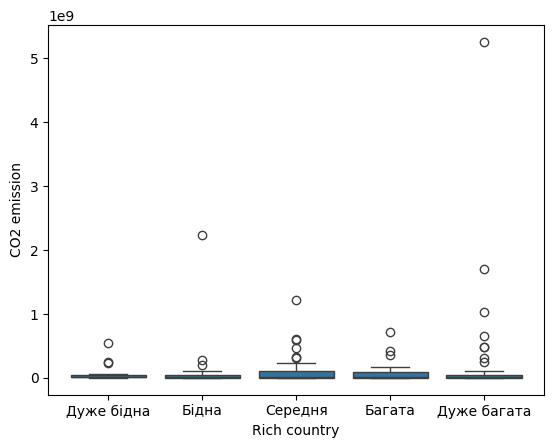

In [71]:
group2 = df[['Rich country', 'CO2 emission']].groupby(['Rich country'])
groups = [group2.get_group(group)['CO2 emission'] for group in group2.groups]
f_val, p_val = stats.f_oneway(*groups)
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.plot()
print(f"ANOVA results: F = {f_val}, P = {p_val}")

<h2>Виконав студент групи ІП-23 <br> Востріков Любомир</h2>